# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Train test split and Scaling data
6. Linear Regression
7. Logistic Regression
8. K Nearest Neighbour
---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## 2. Loading data with Pandas

We need to load `placement_data.csv` into a dataframe so that we can work with it in Python

In [2]:
df = pd.read_csv('../DATA/placement-dataset.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


We will create a new dataframe by removing unwanted features such as the "Unnamed: 0" column.

In [5]:
# dropping unwanted features
new_df = df.drop('Unnamed: 0', axis=1)

In [10]:
new_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


---
## 3. Statistics

Now let's look at some statistics about the datasets

In [22]:
new_df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


## 4. Data visualization

Now let's dive a bit deeper into the dataframes. We will visualize the data with plots and graphs to gain a better understanding about the dataset using matplotlib and seaborn.

Text(0.5, 1.0, 'Scatterplot of IQ and CGPA')

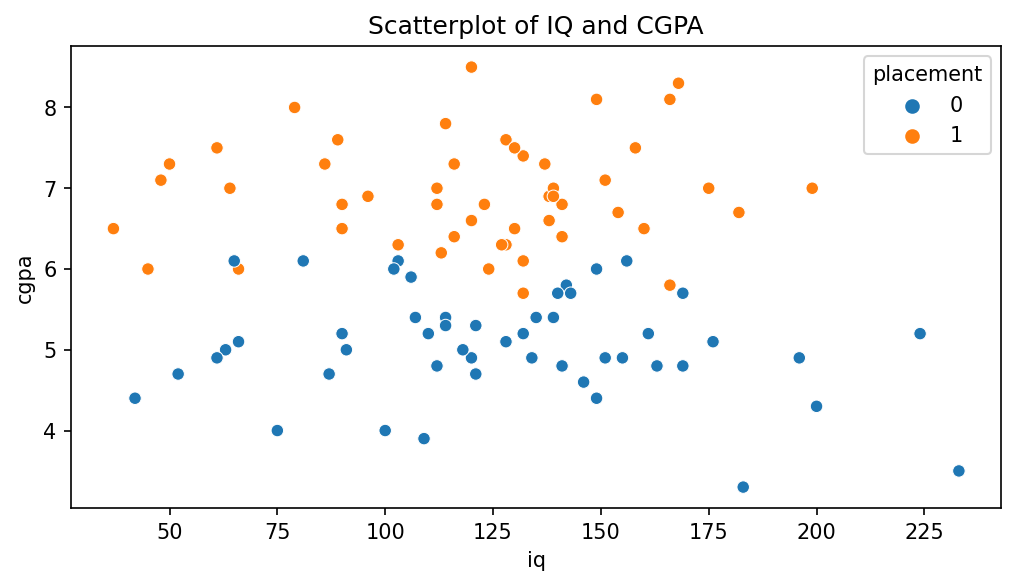

In [6]:
# Visualization using a scatterplot
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=new_df, y='cgpa', x='iq', hue='placement')
plt.title('Scatterplot of IQ and CGPA')

The scatterplot analysis reveals that there is no discernible correlation between a student's IQ and their CGPA, as well as their chances of being placed in college. This suggests that possessing a high IQ does not guarantee a correspondingly high CGPA or a greater likelihood of college placement. On the other hand, a robust correlation is observed between a student's CGPA and the probability of securing placement. In other words, as the CGPA of a student increases, so does the likelihood of them being successfully placed in a college.

In [ ]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

Lets explore the distribution of the student IQ and CGPA scores in the dataset.

Text(0.5, 1.0, 'Distribution of Student IQ')

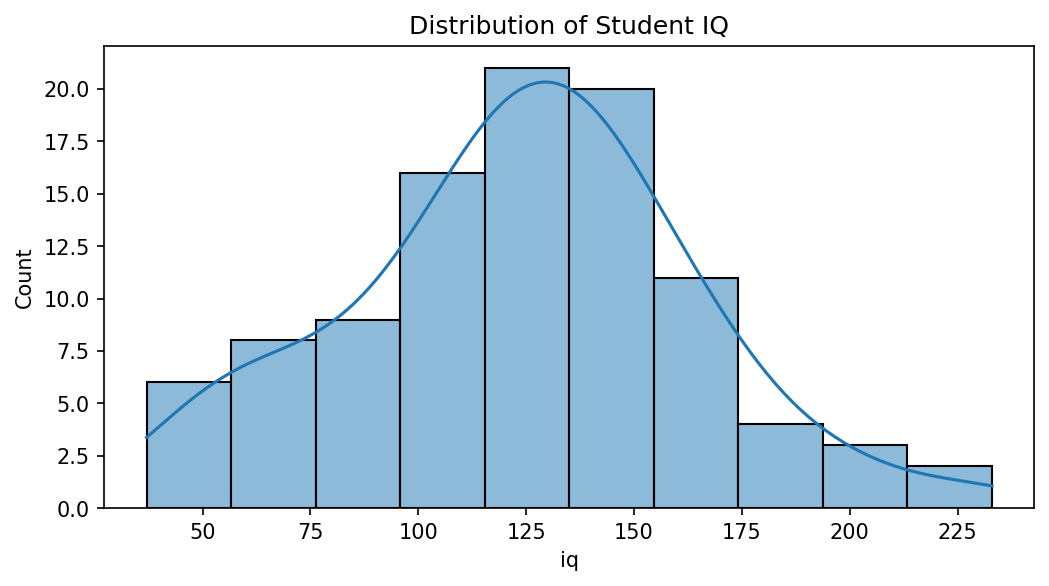

In [7]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=new_df, x='iq', kde=True)
plt.title('Distribution of Student IQ')

Text(0.5, 1.0, 'Distribution of Student CGPA')

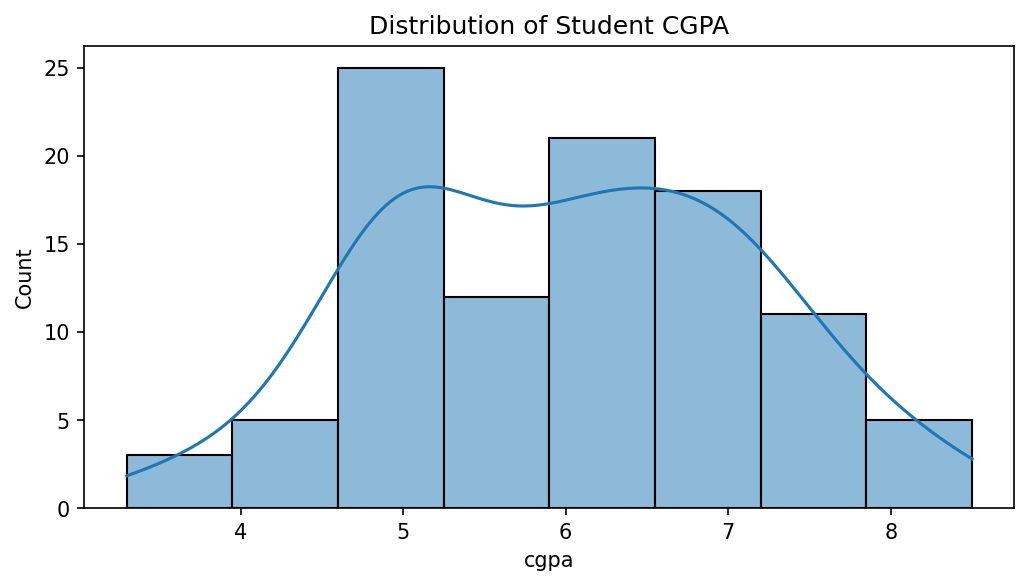

In [9]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=new_df, x='cgpa', kde=True)
plt.title('Distribution of Student CGPA')

---

## 5. Train Test Split 

The dataset is prepared for a machine learning model to predict placement status based on student-related features. The features (X) are obtained by excluding the 'placement' column, which serves as the target variable (y). The data is then split into training and test sets using the train_test_split function from scikit-learn. To ensure consistency in the model, the features are standardized using the StandardScaler, with the scaler fitted and applied to both the training (scaled_X_train) and test sets (scaled_X_test)

### A. Linear Regression

In [12]:
# Prepare the features and target variable
X = df.drop('placement', axis=1) # features
y = df['placement'] #target variable

# Train test split and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Creating a StandardScaler object
scaler = StandardScaler()

# fit scaler object unto training data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

A linear regression model is created and trained using the scikit-learn library. The LinearRegression class is imported, and an instance of the model is created as 'linear_model.' This model will be trained on the prepared dataset to establish relationships between the input features and the target variable, contributing to the predictive capabilities of the model

In [11]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

The Linear Regression model is fitted to the standardized training data (scaled_X_train) and the corresponding target variable (y_train). This process involves training the model to learn the relationships between the standardized input features and the target variable, enabling it to make predictions on new, unseen data based on the learned patterns from the training set

In [15]:
# linear model is fitted unto the standardised X trained data and y_train
linear_model.fit(scaled_X_train, y_train)

LinearRegression()

In [16]:
# Generate predictions (y_pred) using the trained Linear Regression model on the standardized test data (scaled_X_test)
y_pred = linear_model.predict(scaled_X_test)

The performance of the Linear Regression model is evaluated using common regression metrics. Mean Absolute Error (MAE) and Mean Squared Error (MSE) are calculated by comparing the model's predictions (y_pred) with the actual target values in the test set (y_test). These metrics provide insights into the accuracy and precision of the model's predictions, aiding in the assessment of its effectiveness in capturing the underlying patterns in the data.

In [17]:
# evaluating our model
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [ ]:
MAE,MSE

(0.23145495247874165, 0.0672153252470985)

The MAE value of approximately 0.23 suggests that, on average, the model's predictions deviate by 0.23 units from the actual values in the test set. Lower MAE values indicate better model performance, and 0.23 is a relatively small error, suggesting that the model is making accurate predictions on average.

The MSE value of approximately 0.067 indicates the average of the squared errors. Since MSE squares the errors, it tends to be more sensitive to large errors than MAE. Like MAE, lower MSE values are desirable. In this case, the relatively small MSE suggests that, on average, the model's predictions have small squared differences from the actual values.

In [ ]:
linear_model.coef_

array([0.0388603 , 0.40526868, 0.00583616])

In [ ]:
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,0.038860
cgpa,0.405269
iq,0.005836


In [ ]:
new_df.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


In [ ]:
# strong correlation between good cgpa and placement

### B. Logistic Regression

A Logistic Regression model is created and trained using the scikit-learn library. The LogisticRegression class is imported, and an instance of the model is created as 'log_model.' The model is then fitted to the standardized training data (scaled_X_train) and the corresponding target variable (y_train). Logistic Regression is commonly used for binary classification tasks, making it suitable for predicting placement status based on the prepared dataset.

In [18]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

# log model is fitted unto the standardised X trained data and y_train
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [19]:
y_pred = log_model.predict(scaled_X_test)

Evaluation metrics for the Logistic Regression model are computed to assess its performance. The confusion matrix and classification report are obtained using scikit-learn's metrics module. The confusion matrix provides a breakdown of true positive, true negative, false positive, and false negative predictions. The classification report includes precision, recall, and F1-score metrics, offering a comprehensive overview of the model's ability to correctly classify instances and its overall performance on the test set

In [20]:
# evaluation metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# confusion metrics
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[11,  0],
       [ 1,  8]], dtype=int64)

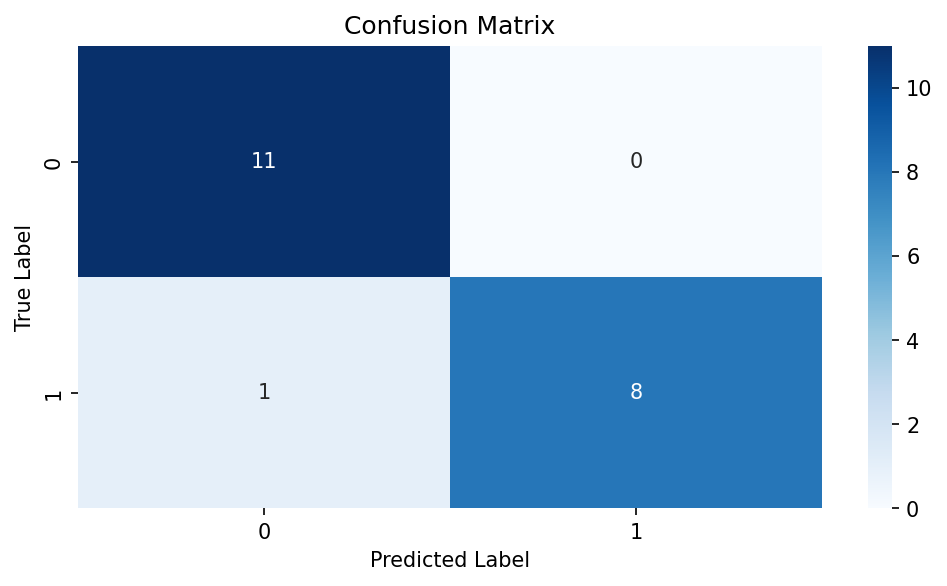

In [22]:
# visualizing the confusion matrix with matplotlib
plt.figure(figsize=(8, 4), dpi=150)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



The Logistic Regression model was applied to predict student placement based on features such as CGPA and IQ. The evaluation metrics, including the confusion matrix and classification report, provide insights into the model's performance.

### Classification Report interpretion:

Precision: Precision for class 0 (non-placement) is 0.92, and for class 1 (placement) is 1.00. 

Recall: Recall for class 0 is 1.00, and for class 1 is 0.89.

F1-Score: F1-score balances precision and recall, yielding high values for both classes.

Support: The number of instances for each class in the dataset.

Accuracy: Overall accuracy of the model is 95%.

### Coefficient and Correlation Matrix:

Coefficients indicate the impact of features on the predicted outcome. 
CGPA has a strong positive impact, while IQ has a smaller positive impact.
The correlation matrix shows a high positive correlation (0.82) between CGPA and placement, indicating a significant relationship.

---

### C. K Nearest Neighbours

A K-Nearest Neighbors (KNN) classification model is implemented using the scikit-learn library. The KNeighborsClassifier class is utilized, and an instance of the model is created with the parameter n_neighbors set to 1, indicating a 'nearest neighbor' approach with a single neighbor considered. The model is then trained on the standardized training data (scaled_X_train) and the corresponding target variable (y_train).

In [26]:
# knn model
from sklearn.neighbors import KNeighborsClassifier

#testing with n=1
knn_model = KNeighborsClassifier(n_neighbors=1)

# knn model is fitted unto the standardised X trained data and y_train
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  0],
       [ 1,  8]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



### Choosing the optimal k value

The model with k=1 has an accuracy of 95% which is good. But we can also explore if it can be improved if we chose anothet k value.

A loop is implemented to find the ideal value of 'k' for a K-Nearest Neighbors (KNN) classification model. The loop iterates over a range of 'k' values from 1 to 9. For each 'k', a KNN model is trained on the standardized training data and evaluated on the test set. The test error rates are calculated, and the results are visualized using the elbow method. The plot displays the relationship between the 'k' values and their corresponding test error rates, helping to identify an optimal 'k' value that balances model complexity and accuracy.

Text(0.5, 0, 'K Value')

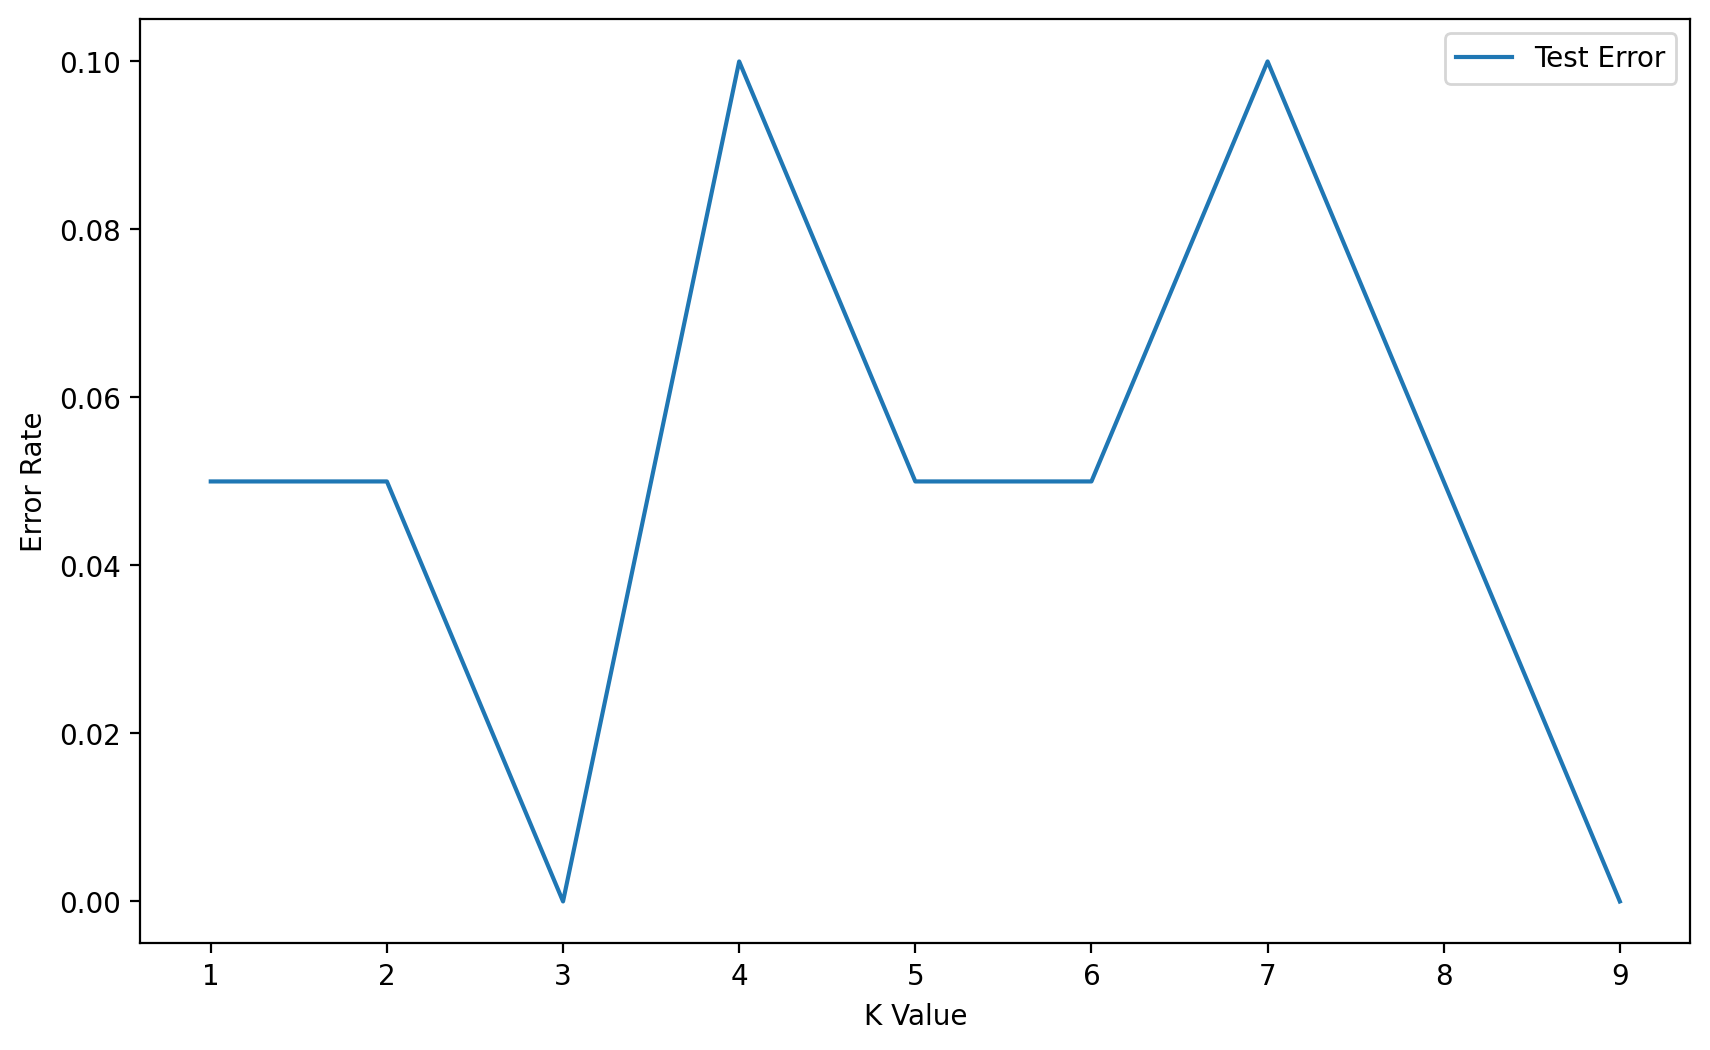

In [ ]:
#finding the ideal k value
test_error_rates = []


for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
# elbow method
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,10),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

The optimal k values with a 0 test error rate are 3 and 9. let's test them out

In [ ]:
#testing with n=3
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

confusion_matrix(y_test,y_pred)

array([[11,  0],
       [ 0,  9]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Using k=3 the model has an accuracy of 100%. 

### Testing the prediction of the model

In [27]:
# creating a new student variable 
test_student = X_test.iloc[0]
test_student

Unnamed: 0     16.0
cgpa            5.2
iq            224.0
Name: 16, dtype: float64

In [28]:
knn_model.predict(test_student.values.reshape(1, -1))

array([0], dtype=int64)

In [29]:
# checking placement 
y_test.iloc[0]

0

The model predicted the placement of the student correctly!

In summary, each model exhibited favorable predictive capabilities, with Logistic Regression excelling in accuracy and KNN performing optimally with an appropriate choice of k. The choice of the best model may depend on specific considerations, such as interpretability, computational efficiency, and the importance of false positives and false negatives in the placement prediction task. Thank you